## 1. Archive exploration 

Computer modeling impacts of hurricanes across the Yucatan Peninsula since 1851. Includes information about Saffir-Simpson huricane category based on sustained wind speed for each hurricane. 

Category 1-5. (least severe to catastrophic) 

## 2. Data loading and preliminary exploration


In [1]:
import pandas as pd 
url = 'https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469'

df = pd.read_csv(url)

In [2]:
# Obtain preliminary infomration about df 
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB


,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1
...,...,...,...,...,...,...,...,...
100,Y1995a,1995-10-01,1995-10-03,15,Opal,1,N*,F0
101,Y1995b,1995-10-10,1995-10-16,17,Roxanne,3,N,F2
102,Y1996,1996-08-20,1996-08-20,4,Dolly,1,N,F1
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


## 3. Brainstorm

In [19]:
cat5 = df.loc[df.ss == 5]
cat5

,code,start.date,end.date,number,name,ss,track,rf.max
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1


In [4]:
cat5['start.date'] = pd.to_datetime(cat5['start.date'])
cat5['end.date'] = pd.to_datetime(cat5['end.date'])
cat5['duration'] = cat5['end.date'] - cat5['start.date']
cat5.head()

/tmp/ipykernel_3292798/2812029899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['start.date'] = pd.to_datetime(cat5['start.date'])
/tmp/ipykernel_3292798/2812029899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat5['end.date'] = pd.to_datetime(cat5['end.date'])
/tmp/ipykernel_3292798/2812029899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28,1955-09-28,10,Janet,5,N,F3,0 days
96,Y1980a,1980-08-07,1980-08-08,1,Allen,5,O,F3,1 days
98,Y1988,1988-09-14,1988-09-15,8,Gilbert,5,N,F3,1 days
103,Y1998,1998-10-27,1998-10-28,13,Mitch,5,S,F1,1 days


## 5: Visualize Saffir-Simpson categories across time

In [5]:
import matplotlib.pyplot as plt

In [6]:
# Coerce start date to datetime 
df['start.date'] = pd.to_datetime(df['start.date'])
#df['end.date'] = pd.to_datetime(cat5['end.date'])

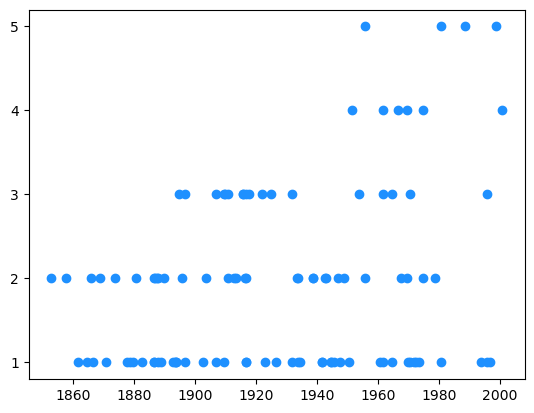

In [16]:
# Create plot
fig, ax = plt.subplots()
ax.scatter(df['start.date'], df['ss'], color = 'dodgerblue')
ax.set_yticks([1, 2, 3, 4, 5])


## Analyze plot 

Frequency of hurricans decreases as the SS category increases. The most common SS category through time is category one. There have been an increase in category 4 and 5 hurricans since the 1950s. 

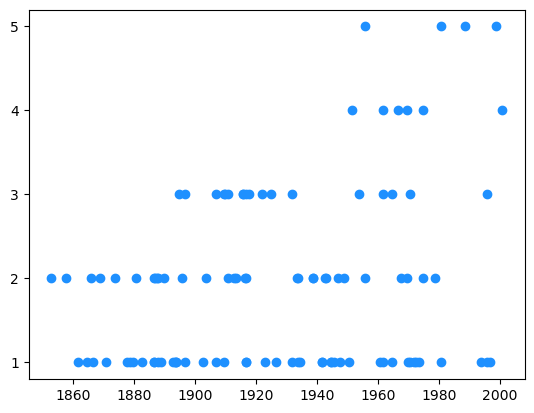

In [17]:
import pandas as pd 
import matplotlib.pyplot as plt

url = 'https://pasta.lternet.edu/package/data/eml/knb-lter-hfr/71/23/ab0fe2bf4f3ad850371ccb9c69d78469'
df = pd.read_csv(url)

# Coerce start date to datetime 
df['start.date'] = pd.to_datetime(df['start.date'])

# Create plot
fig, ax = plt.subplots()
ax.scatter(df['start.date'], df['ss'], color = 'dodgerblue')
ax.set_yticks([1, 2, 3, 4, 5])
